# About The Dataset-

age: Age Of Primary Beneficiary

sex: Insurance Contractor Gender, Female, Male

bmi: Body Mass Index, Providing An Understanding Of Body, Weights That Are Relatively High Or Low Relative To Height, Objective Index Of Body Weight (kg / m ^ 2) Using The Ratio Of Height To Weight, Ideally 18.5 To 24.9

children: Number Of Children Covered By Health iInsurance / Number Of Dependents

smoker: Smoking

region: The Beneficiary's Residential Area In USA, NorthEast, SouthEast, SouthWest, NorthWest.

charges: Individual Medical Costs Billed By Health Insurance

In [10]:
#importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


# IMPORTING DATA

In [11]:
#Data collection and Analysis
df = pd.read_csv('insurance Regression.csv')

In [12]:
#View first few rows of the dataset
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [13]:
#to find the rows and the columns 
df.shape


(1338, 7)

In [14]:
#getting some information about the dataset
#categorical features are sex, smoker and region
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [15]:
#checking for missing values
df.isnull().sum


<bound method NDFrame._add_numeric_operations.<locals>.sum of         age    sex    bmi  children  smoker  region  charges
0     False  False  False     False   False   False    False
1     False  False  False     False   False   False    False
2     False  False  False     False   False   False    False
3     False  False  False     False   False   False    False
4     False  False  False     False   False   False    False
...     ...    ...    ...       ...     ...     ...      ...
1333  False  False  False     False   False   False    False
1334  False  False  False     False   False   False    False
1335  False  False  False     False   False   False    False
1336  False  False  False     False   False   False    False
1337  False  False  False     False   False   False    False

[1338 rows x 7 columns]>

# EDA

In [16]:
#Analysis of data
#Statistical measures of the dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


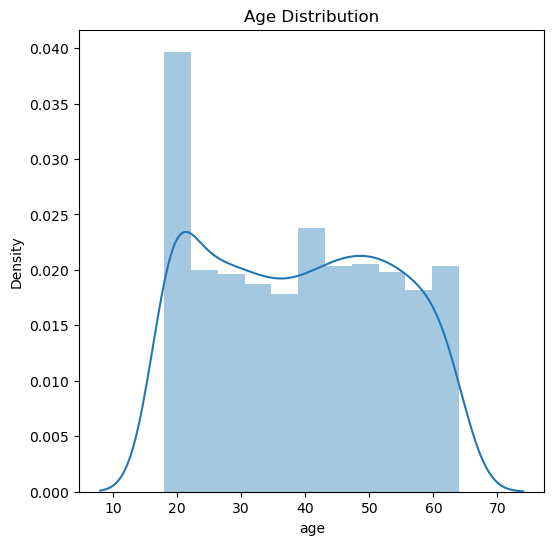

In [17]:
#distribution of age value
sns.set
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

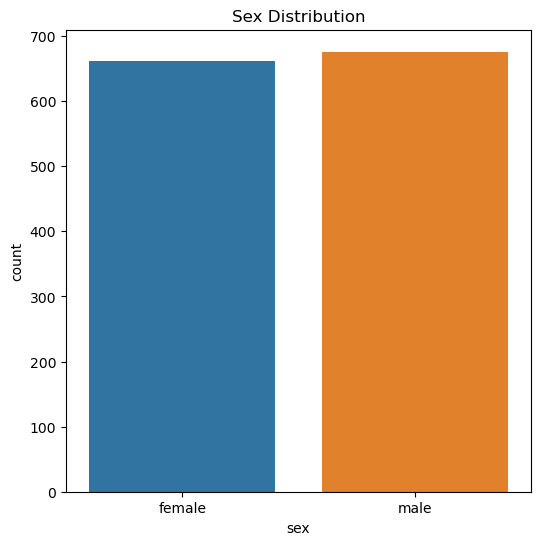

In [18]:
#GenderColumn
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


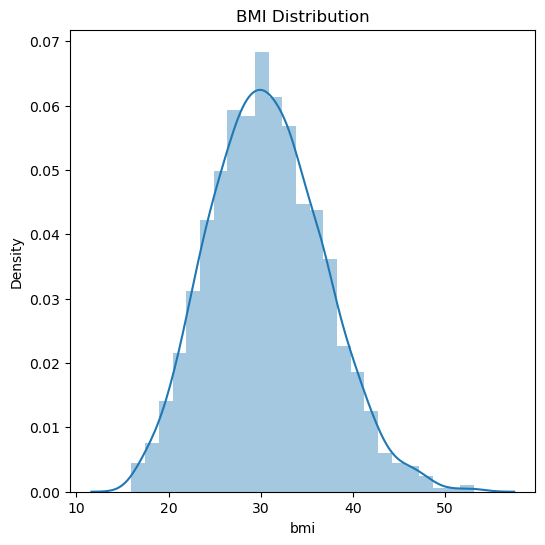

In [19]:
#distribution of bmi value
sns.set
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

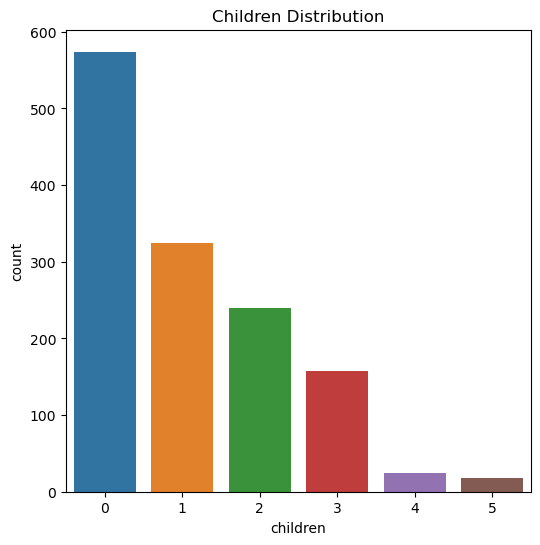

In [20]:
#ChildrenColumn
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=df)
plt.title('Children Distribution')
plt.show()

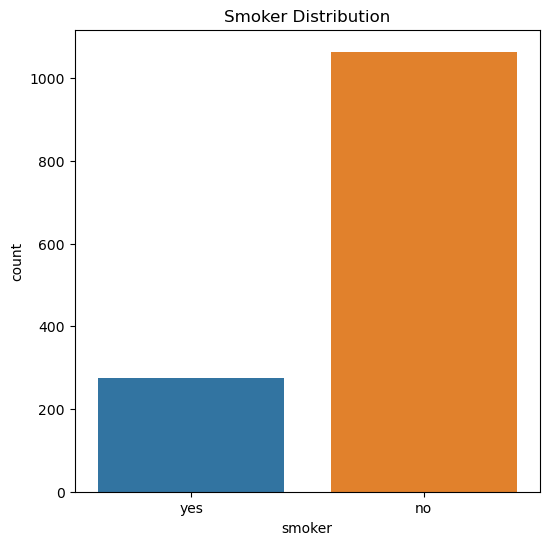

In [21]:
#distribution of smoker
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=df)
plt.title('Smoker Distribution')
plt.show()

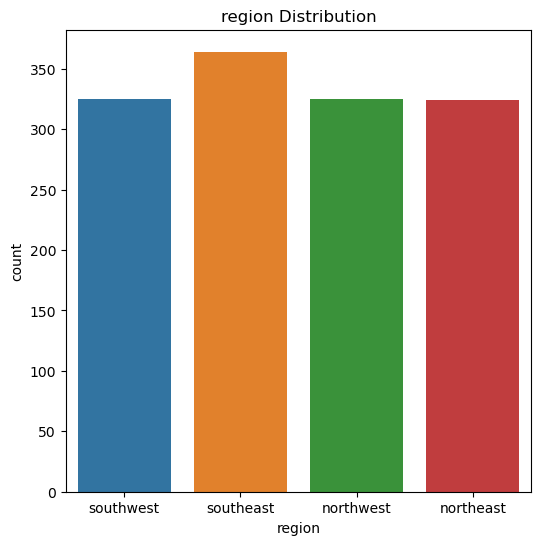

In [22]:
#distribution of region
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=df)
plt.title('region Distribution')
plt.show()

In [ ]:
# distribution of charges
sns.set
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('Charges Distribution')
plt.show()

# DATA PREPROCESSING

In [24]:
#Data Preprocessing
# encoding sex column
df.replace({'sex':{'male':0,'female':1}}, inplace=True)

3 # encoding 'smoker' column
df.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [25]:
X = df.drop(columns='charges', axis=1)
Y = df['charges']

In [26]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [27]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [28]:
#Splitting the data into Training data & Testing Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


# LINEAR REGRESSION






In [50]:
#Model Training
#Linear Regression
# loading the Linear Regression model
regressor = LinearRegression()

In [31]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [32]:
#Model Evaluation
# prediction on training data
training_data_prediction =regressor.predict(X_train)

In [33]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.751505643411174


In [34]:
# prediction on test data
test_data_prediction =regressor.predict(X_test)

In [35]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.7447273869684077


In [39]:
#Splitting The Parameters And Target Variable
X = df.drop(columns='charges',axis=1)
Y = df['charges']

# RANDOM FOREST REGRESSOR


In [40]:
#Model
model = RandomForestRegressor()

In [41]:
model.fit(X_train,Y_train)

RandomForestRegressor()

In [42]:
#Testing The Prediction
testing_data_prediction = model.predict(X_test)

In [43]:
#Accuracy Score
score = metrics.r2_score(Y_test,testing_data_prediction)
score

0.833831218262538

In [44]:
#Building The Prediction System
input_data = (19,0,27.9,0,1,3)
input_data_array = np.asarray(input_data)

#reshaping the data so that it works for only one instance at a time
input_data_reshaped = input_data_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print('Predicted Medical Insurance Cost : ',str(prediction))

Predicted Medical Insurance Cost :  [1631.4437555]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
